In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/DA專案/資料/zomato_new.csv')

In [ ]:
df

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60074,"Four Points by Sheraton Bengaluru, 43/3, White...",No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
60075,"Number 10, Garudachar Palya, Mahadevapura, Whi...",No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
60076,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
60077,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [ ]:
df=df.dropna(how='all')

In [ ]:
df

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60074,"Four Points by Sheraton Bengaluru, 43/3, White...",No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
60075,"Number 10, Garudachar Palya, Mahadevapura, Whi...",No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
60076,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
60077,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [ ]:
df['listed_in(city)']

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Banashankari
             ...     
60074      Whitefield
60075      Whitefield
60076      Whitefield
60077      Whitefield
60078      Whitefield
Name: listed_in(city), Length: 55895, dtype: object

In [ ]:
nullsum = df.isnull().sum()

In [ ]:
nullsum

address                            1
online_order                       3
book_table                        30
rate                            7814
votes                             45
location                          90
rest_type                        302
dish_liked                     28164
cuisines                         149
approx_cost(for two people)      458
reviews_list                     129
listed_in(type)                 4318
listed_in(city)                 4323
dtype: int64

In [ ]:
df=df.dropna(axis=0,subset=['listed_in(city)','location'])

In [ ]:
df

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60074,"Four Points by Sheraton Bengaluru, 43/3, White...",No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
60075,"Number 10, Garudachar Palya, Mahadevapura, Whi...",No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
60076,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
60077,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [ ]:
nullsum = df.isnull().sum()
nullsum

address                            1
online_order                       3
book_table                         3
rate                            7753
votes                              4
location                           0
rest_type                        193
dish_liked                     27920
cuisines                          26
approx_cost(for two people)      304
reviews_list                       5
listed_in(type)                    5
listed_in(city)                    0
dtype: int64

In [ ]:
#查找那些columns有0
#df.loc[:,(df=='0').any()].columns
#數值資料有0的:rate votes approx_cost(for two people)
#類別資料有0的:online_order', 'book_table', 'rate', 'votes', 'rest_type', 'dish_liked', 'cuisines', 'reviews_list', 'listed_in(type)

#df.dtypes
df2=df.replace('0',np.nan)#再把之前用的0弄回na後面才能填值
df3=df2.replace('NEW',np.nan)
df3=df3.replace('[]',np.nan)
df4=df3[-((df3['rate'].isnull()==True)&(df3['votes'].isnull()==True))]#刪除rate,votes=0&NEW的列
df4

#approx_cost搞不出來
#df2['approx_cost(for two people)'].replace(0,np.nan)
#mean=df2.mean(skipna=True)
#df3=df2['approx_cost(for two people)'].fillna(mean)


,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60071,"136, SAP Labs India, KIADB Export Promotion In...",No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
60073,"139/C1, Next To GR Tech Park, Pattandur Agraha...",No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
60074,"Four Points by Sheraton Bengaluru, 43/3, White...",No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
60077,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [ ]:
df.dtypes

address                        object
online_order                   object
book_table                     object
rate                           object
votes                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
#去除重複值
df5=df4[-((df4['online_order']!='Yes')&(df4['online_order']!='No'))]
df5
df5[df5.duplicated(subset=None,keep='first')]#印出重複項目
df6=df5.drop_duplicates(keep='first',inplace=False)#消除他們
df6[df6.duplicated(subset=None,keep='first')]#檢查 乾淨了!
df6

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60071,"136, SAP Labs India, KIADB Export Promotion In...",No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
60073,"139/C1, Next To GR Tech Park, Pattandur Agraha...",No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
60074,"Four Points by Sheraton Bengaluru, 43/3, White...",No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
60077,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [ ]:
#處理New/[]
#df6.loc[:,(df6=='New').any()].columns #檢查出沒有New
#df6.loc[:,(df6=='[]').any()].columns 
#df7=df6.fillna('*')
#nullsum2 = df7.isnull().sum()
#nullsum2
#注意之後要把approx_cost(for two people)改回數值
df6['listed_in(city)'].value_counts()


BTM                      2396
Koramangala 7th Block    2132
Koramangala 4th Block    2033
Koramangala 5th Block    1987
Koramangala 6th Block    1903
Jayanagar                1822
JP Nagar                 1503
Indiranagar              1413
Church Street            1345
Brigade Road             1295
MG Road                  1271
Lavelle Road             1253
HSR                      1202
Marathahalli             1173
Residency Road           1158
Bannerghatta Road        1149
Whitefield               1104
Brookefield              1072
Old Airport Road         1053
Basavanagudi             1045
Sarjapur Road             935
Kalyan Nagar              934
Kammanahalli              929
Bellandur                 886
Malleshwaram              885
Frazer Town               885
Rajajinagar               803
Electronic City           787
Banashankari              701
New BEL Road              530
Name: listed_in(city), dtype: int64

In [ ]:
list = df6['location'].tolist()
print('data\n',list,'\n',type(list))
s=set(list)
len(s)

#plt.boxplot(data)
#plt.show()

data
 ['Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Basavanagudi', 'Basavanagudi', 'Mysore Road', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Basavanagudi', 'Basavanagudi', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Basavanagudi', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Kumaraswamy Layout', 'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Kumaraswamy Layout', 'Banashankari', 'Vijay Nagar', 'Banashankari', 'Jayanagar', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Banashankari', 'Kumaraswamy Layout', 'Basavanagudi', 'Banashankari', 'Banashankari', 'Basavanagudi', 'Jayanagar', 'Banashan

92

In [ ]:
#切割rate欄位（切割完的欄位在最右邊！'rate1'）
rate1=pd.DataFrame((str(x).split('/') for x in df6['rate']),index=df6.index,columns=['rate1','rate2'])
df6=pd.merge(df6,rate1,right_index=True,left_index=True)
df6

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate1,rate2
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,5
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,5
2,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,5
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,5
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60071,"136, SAP Labs India, KIADB Export Promotion In...",No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield,3.7,5
60073,"139/C1, Next To GR Tech Park, Pattandur Agraha...",No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,2.5,5
60074,"Four Points by Sheraton Bengaluru, 43/3, White...",No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,3.6,5
60077,Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,4.3,5


In [ ]:
#把rate_y欄轉成浮點數，之後才能進行計算
df6['rate1']=pd.to_numeric(df6['rate1'],errors = 'coerce')
df6.dtypes

address                         object
online_order                    object
book_table                      object
rate                            object
votes                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
listed_in(type)                 object
listed_in(city)                 object
rate1                          float64
rate2                           object
dtype: object

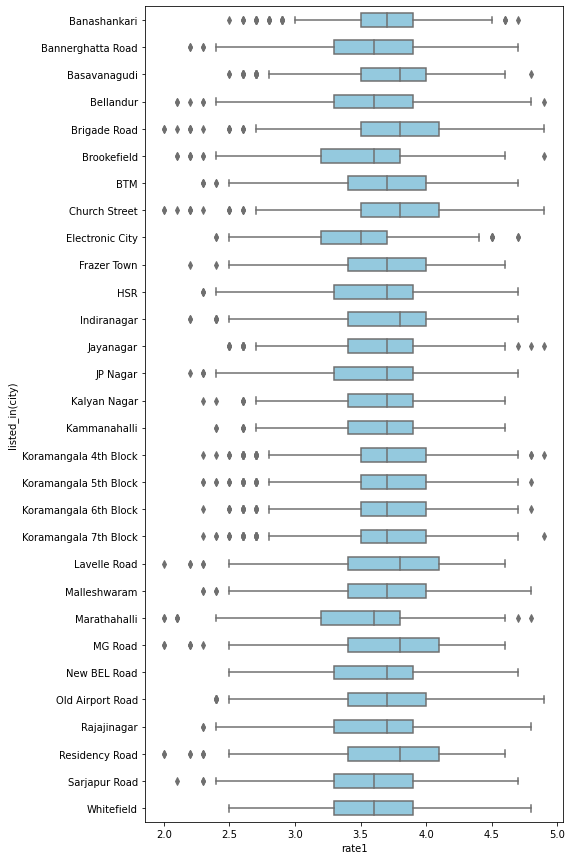

In [ ]:
#畫盒狀圖
fig = plt.figure(figsize=(7.5,15)) 
cities_bp = sns.boxplot(x=df6['rate1'] ,y = df6['listed_in(city)'],color = "skyblue", width=0.5)

In [ ]:
df6.groupby("listed_in(city)")['rate1'].mean()

listed_in(city)
BTM                      3.672287
Banashankari             3.668046
Bannerghatta Road        3.555178
Basavanagudi             3.698348
Bellandur                3.587810
Brigade Road             3.751969
Brookefield              3.537407
Church Street            3.764164
Electronic City          3.478780
Frazer Town              3.691073
HSR                      3.613905
Indiranagar              3.704823
JP Nagar                 3.610453
Jayanagar                3.674018
Kalyan Nagar             3.635867
Kammanahalli             3.624758
Koramangala 4th Block    3.713773
Koramangala 5th Block    3.705337
Koramangala 6th Block    3.709473
Koramangala 7th Block    3.710600
Lavelle Road             3.720192
MG Road                  3.740598
Malleshwaram             3.684520
Marathahalli             3.519352
New BEL Road             3.620566
Old Airport Road         3.667174
Rajajinagar              3.624533
Residency Road           3.726275
Sarjapur Road            3.55935

In [ ]:
#把approx_cost(for two people)欄轉成浮點數，之後才能進行計算
df6['approx_cost(for two people)']=pd.to_numeric(df6['approx_cost(for two people)'],errors = 'coerce')
df6.dtypes

address                         object
online_order                    object
book_table                      object
rate                            object
votes                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
listed_in(type)                 object
listed_in(city)                 object
rate1                          float64
rate2                           object
dtype: object

In [ ]:
avg_citycost = df6.groupby("listed_in(city)")['approx_cost(for two people)'].mean()
avg_citycost

listed_in(city)
BTM                      426.855433
Banashankari             397.277941
Bannerghatta Road        427.142857
Basavanagudi             402.979445
Bellandur                437.455013
Brigade Road             443.838604
Brookefield              445.915202
Church Street            445.749203
Electronic City          430.661765
Frazer Town              432.356091
HSR                      430.329475
Indiranagar              441.467972
JP Nagar                 416.198582
Jayanagar                420.480998
Kalyan Nagar             458.672875
Kammanahalli             451.453488
Koramangala 4th Block    437.378319
Koramangala 5th Block    429.143019
Koramangala 6th Block    427.115159
Koramangala 7th Block    427.621333
Lavelle Road             438.560841
MG Road                  439.791209
Malleshwaram             424.829396
Marathahalli             432.113068
New BEL Road             420.731707
Old Airport Road         438.075601
Rajajinagar              401.262272
Residency Ro

In [ ]:
df6["listed_in(city)"]
city = np.unique(df6["listed_in(city)"])
city

array(['BTM', 'Banashankari', 'Bannerghatta Road', 'Basavanagudi',
       'Bellandur', 'Brigade Road', 'Brookefield', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'MG Road', 'Malleshwaram', 'Marathahalli', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

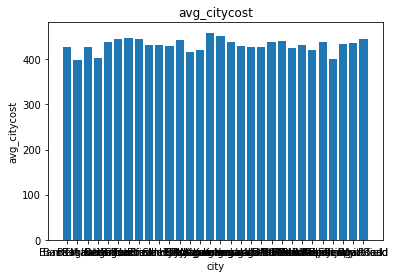

In [ ]:
plt.bar(city,avg_citycost)
plt.xlabel('city')
plt.ylabel('avg_citycost')
plt.title('avg_citycost')
plt.show()

In [ ]:
df6.groupby("listed_in(city)")['approx_cost(for two people)'].describe()

,count,mean,std,min,25%,50%,75%,max
listed_in(city),,,,,,,,
BTM,2172.0,426.855433,188.370088,70.0,300.0,400.0,550.0,950.0
Banashankari,680.0,397.277941,211.010831,100.0,200.0,350.0,550.0,950.0
Bannerghatta Road,1078.0,427.142857,186.343400,100.0,300.0,400.0,550.0,950.0
Basavanagudi,973.0,402.979445,215.564060,100.0,200.0,400.0,550.0,950.0
Bellandur,778.0,437.455013,185.065855,100.0,300.0,400.0,550.0,950.0
Brigade Road,917.0,443.838604,206.906114,40.0,300.0,400.0,600.0,950.0
Brookefield,967.0,445.915202,189.054433,100.0,300.0,400.0,600.0,900.0
Church Street,941.0,445.749203,208.513984,40.0,300.0,400.0,600.0,950.0
Electronic City,680.0,430.661765,178.019716,100.0,300.0,400.0,550.0,900.0


In [ ]:
Malleshwaram = pd.read_csv('/content/drive/Shareddrives/DA專案/資料/listed_Malleshwaram.csv')
Malleshwaram 

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Rate,Trate
0,"TheGreenPath,OrganicState,OppositeMantriMetros...",No,Yes,4.3/5,1143,Malleshwaram,CasualDining,"LunchBuffet,MilletPizza,Salads,BeetrootPayasam...","NorthIndian,SouthIndian","1,100","[('Rated4.5','RATED\nThemealatGreenPathwasanel...",Buffet,Malleshwaram,4.3,5
1,"15,3rdFloor,SankeyMainRoad,LowerPalaceOrchard,...",No,Yes,4.3/5,592,SadashivNagar,CasualDining,"VegetableBiryani,Panipuri,Chaat,PaneerTikka,Lu...",NorthIndian,"1,200","[('Rated4.0',""RATED\nAmbience:3.5/5\nVeryfunky...",Buffet,Malleshwaram,4.3,5
2,"1stFloor,OrionMall,BrigadeGateway,Dr.RajkumarR...",Yes,Yes,4.3/5,1099,Malleshwaram,CasualDining,"Pizza,Pasta,Wine,Cocktails,Mocktails,Mojito,Ti...","Italian,Salad,Mediterranean","1,500","[('Rated4.0','RATED\nOrderedtwooftheirbestsell...",Buffet,Malleshwaram,4.3,5
3,"5,4thFloor,AboveGIRIAS,15thCross,Malleshwaram,...",No,Yes,4.0/5,1070,Malleshwaram,CasualDining,"Jal-jeera,Roti,Dhokla,Biryani,Kheer,Chaach,Dal...","NorthIndian,Chinese",950,"[('Rated4.0','RATED\nWenthereforabuffetlunch,b...",Buffet,Malleshwaram,4.0,5
4,"MantriSquareMall,ShopNoT-38,3rdfloor,1Sampaige...",No,Yes,4.0/5,568,Malleshwaram,CasualDining,"Buttermilk,Jalebi,Roti,Chaat,Noodles,Vegetable...","NorthIndian,SouthIndian","1,000","[('Rated5.0','RATED\nStaffisfriendlyandtheambi...",Buffet,Malleshwaram,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"Shop186/10,1stFloor,SirurParkRoad,Seshadripura...",No,No,3.4/5,11,Seshadripuram,"Bar,CasualDining",NaN,"NorthIndian,SouthIndian",800,"[('Rated4.0','RATED\nCametomantrimallnearsampi...",Pubsandbars,Malleshwaram,3.4,5
881,"19/2,KumaraKrupaRoad,OffRaceCourseRoad,Bangalore",No,No,4.5/5,3960,RaceCourseRoad,"CasualDining,Bar","SoanPapdi,Mocktails,Panipuri,Kulfi,Cocktails,M...","Pizza,NorthIndian,ModernIndian","1,300","[('Rated5.0','RATED\nAvegetarianrestaurantwith...",Pubsandbars,Malleshwaram,4.5,5
882,"17,17/1,GroundFloor,MadhavanagarExtension,Race...",No,Yes,4.2/5,167,RaceCourseRoad,"Bar,CasualDining",Cocktails,Continental,"1,400","[('Rated5.0','RATED\nBingo!Who\x83\x83\x82\x83...",Pubsandbars,Malleshwaram,4.2,5
883,"HotelBangaloreInternational,2A-2B,CrescentRoad...",No,No,3.2/5,2,RaceCourseRoad,"CasualDining,Bar",NaN,FingerFood,"1,100",NaN,Pubsandbars,Malleshwaram,3.2,5


In [ ]:
Malleshwaram['Rate'].describe()

count    885.000000
mean       3.684520
std        0.414224
min        2.300000
25%        3.400000
50%        3.700000
75%        4.000000
max        4.800000
Name: Rate, dtype: float64

In [ ]:
#低評分 3.4以下
#中評分 3.4-4.0(輔助參考)
#高評分 4.0以上



In [ ]:
# 清除一些無意義文字
stop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82"])
wordcloud = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


NameError: ignored

In [ ]:
# 文字雲
import jieba
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import STOPWORDS 
#處理英文字串
import nltk
nltk.download("punkt")
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#分群
low=Malleshwaram[Malleshwaram['Rate']<=3.4]
mid=Malleshwaram[(Malleshwaram['Rate']>3.4)&(Malleshwaram['Rate']<4.0)]
top=Malleshwaram[Malleshwaram['Rate']>=4.0]
low

In [ ]:
# 取出df6中的Malleshwaram的review_list
fliter = df6["listed_in(city)"] == "Malleshwaram"
df7 = df6[fliter]
df7

In [ ]:
#分群
low=df7[df7['rate1']<=3.4]
mid=df7[(df7['rate1']>3.4)&(df7['rate1']<4.0)]
top=df7[df7['rate1']>=4.0]
low

In [ ]:
# 目前只剩需要選取低評分序號
df7[df7['rate1']<=3.4 ]
   


In [ ]:
#low_review_list
text = low.reviews_list[45487]

# Create and generate a word cloud image:# 清除一些無意義文字
stop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82"])
wordcloud = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")#關掉坐標軸
plt.show()
#wordcloud.to_file('low.png')

In [ ]:
#low
low=Malleshwaram[Malleshwaram['Rate']<=3.4]
mid=Malleshwaram[(Malleshwaram['Rate']>3.4)&(Malleshwaram['Rate']<4.0)]
top=Malleshwaram[Malleshwaram['Rate']>=4.0]
text = low['reviews_list']
text  
# 轉為string 
low_text = str(text) 
print(low_text) 
print(type(low_text))
#斷句
sentences = nltk.sent_tokenize(low_text) 
sentences 
low_sentences = str(sentences)
#斷字
tokens = [nltk.tokenize.word_tokenize(sent) for sent in sentences]
tokens
low_tokens = str(tokens)
# 計算出現的次數
Counter(low_tokens.split())
#Counter(low_sentences.split())
# 斷字斷句好像還是太多雜訊QQ

In [ ]:
import jieba
for words in text:
  split=jieba.cut(words)
  print('/'.join(split))

In [ ]:
#low
low=Malleshwaram[Malleshwaram['Rate']<=3.4]
mid=Malleshwaram[(Malleshwaram['Rate']>3.4)&(Malleshwaram['Rate']<4.0)]
top=Malleshwaram[Malleshwaram['Rate']>=4.0]
text = str(low['reviews_list'])
#text=str(split)
# Create and generate a word cloud image:# 清除一些無意義文字
stop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82","Rated4","Rated5","NaN"])
wordcloud = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")#關掉坐標軸
plt.show()
#wordcloud.to_file('low.png')

In [ ]:
#low
low=Malleshwaram[Malleshwaram['Rate']<=3.4]
mid=Malleshwaram[(Malleshwaram['Rate']>3.4)&(Malleshwaram['Rate']<4.0)]
top=Malleshwaram[Malleshwaram['Rate']>=4.0]

text = low.reviews_list[18]

# Create and generate a word cloud image:# 清除一些無意義文字
stop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82"])
wordcloud = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")#關掉坐標軸
plt.show()
#wordcloud.to_file('low.png')

In [ ]:
#mid
low=Malleshwaram[Malleshwaram['Rate']<=3.4]
mid=Malleshwaram[(Malleshwaram['Rate']>3.4)&(Malleshwaram['Rate']<4.0)]
top=Malleshwaram[Malleshwaram['Rate']>=4.0]

text1 = mid.reviews_list[7]

# Create and generate a word cloud image:
wordcloud1 = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color="white").generate(text1)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")#關掉坐標軸
plt.show()
#wordcloud.to_file('mid.png')

In [ ]:
#top
low=Malleshwaram[Malleshwaram['Rate']<=3.4]
mid=Malleshwaram[(Malleshwaram['Rate']>3.4)&(Malleshwaram['Rate']<4.0)]
top=Malleshwaram[Malleshwaram['Rate']>=4.0]

text2 = top.reviews_list[0]

# Create and generate a word cloud image:
wordcloud2 = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color="white").generate(text2)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")#關掉坐標軸
plt.show()
#wordcloud.to_file('top.png')

In [ ]:
# Start with one review:
text = df6.reviews_list[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")#關掉坐標軸
plt.show()
wordcloud.to_file('word_cloud.png')
text

In [ ]:
from wordcloud import STOPWORDS 

In [ ]:
# 清除一些無意義文字
stop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82","0'"])
wordcloud = WordCloud(stopwords = stop_words,max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
raw=pd.read_csv('/content/drive/Shareddrives/DA專案/資料/forwordcloud.csv')
raw

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate1,rate2
0,"The GreenPath, Organic State, Opposite Mantri ...",No,Yes,4.3 /5,1143,Malleshwaram,Casual Dining,"Lunch Buffet, Millet Pizza, Salads, Beetroot P...","North Indian, South Indian",NaN,"[('Rated 4.5', 'RATED\n The meal at Green Pat...",Buffet,Malleshwaram,4.3,5
1,"15, 3rd Floor, Sankey Main Road, Lower Palace ...",No,Yes,4.3 /5,592,Sadashiv Nagar,Casual Dining,"Vegetable Biryani, Panipuri, Chaat, Paneer Tik...",North Indian,NaN,"[('Rated 4.0', ""RATED\n Ambience: 3.5/5\nVery...",Buffet,Malleshwaram,4.3,5
2,"1st Floor, Orion Mall, Brigade Gateway, Dr. Ra...",Yes,Yes,4.3 /5,1099,Malleshwaram,Casual Dining,"Pizza, Pasta, Wine, Cocktails, Mocktails, Moji...","Italian, Salad, Mediterranean",NaN,"[('Rated 4.0', 'RATED\n Ordered two of their ...",Buffet,Malleshwaram,4.3,5
3,"5, 4th Floor, Above GIRIAS, 15th Cross, Malles...",No,Yes,4.0 /5,1070,Malleshwaram,Casual Dining,"Jal-jeera, Roti, Dhokla, Biryani, Kheer, Chaac...","North Indian, Chinese",950.0,"[('Rated 4.0', 'RATED\n Went here for a buffe...",Buffet,Malleshwaram,4.0,5
4,"Mantri Square Mall, Shop No T-38, 3rd floor,1 ...",No,Yes,4.0 /5,568,Malleshwaram,Casual Dining,"Buttermilk, Jalebi, Roti, Chaat, Noodles, Vege...","North Indian, South Indian",NaN,"[('Rated 5.0', 'RATED\n Staff is friendly and...",Buffet,Malleshwaram,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"Shop 186/10, 1st Floor, Sirur Park Road, Sesha...",No,No,3.4 /5,11,Seshadripuram,"Bar, Casual Dining",NaN,"North Indian, South Indian",800.0,"[('Rated 4.0', 'RATED\n Came to mantri mall n...",Pubs and bars,Malleshwaram,3.4,5
881,"19/2, Kumara Krupa Road, Off Race Course Road,...",No,No,4.5 /5,3960,Race Course Road,"Casual Dining, Bar","Soan Papdi, Mocktails, Panipuri, Kulfi, Cockta...","Pizza, North Indian, Modern Indian",NaN,"[('Rated 5.0', 'RATED\n A vegetarian restaura...",Pubs and bars,Malleshwaram,4.5,5
882,"17,17/1, Ground Floor, Madhavanagar Extension,...",No,Yes,4.2 /5,167,Race Course Road,"Bar, Casual Dining",Cocktails,Continental,NaN,"[('Rated 5.0', 'RATED\n Bingo! Who\x83\x83\x8...",Pubs and bars,Malleshwaram,4.2,5
883,"Hotel Bangalore International, 2A-2B, Crescent...",No,No,3.2 /5,2,Race Course Road,"Casual Dining, Bar",NaN,Finger Food,NaN,NaN,Pubs and bars,Malleshwaram,3.2,5


In [ ]:
low=raw[raw['rate1']<=3.4]
mid=raw[(raw['rate1']>3.4)&(raw['rate1']<4.0)]
top=raw[raw['rate1']>=4.0]


In [ ]:
text=low['reviews_list']
text=str(text)
text2=mid['reviews_list']
text2=str(text2)
text3=top['reviews_list']
text3=str(text3)

In [ ]:
#top:Pat,meal,Ambience,Staff,friendly
topstop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82",'0','NaN',"0'","5'","Green","nvery","buffe","Ordered","two","Went","x8","reviews_list","dtype"])
top_wordcloud = WordCloud(stopwords = topstop_words, margin = 0,  contour_width=2, background_color = "black", colormap="Set2",max_words = 25, min_font_size = 8).generate(text3)
plt.imshow(top_wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
#mid
midstop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82",'0','NaN',"Came","ave","Review","coup"])
real_wordcloud = WordCloud(stopwords = midstop_words, margin = 0,  contour_width=2, background_color = "black", colormap="Set2",max_words = 25, min_font_size = 8).generate(text2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
#low
lowstop_words = STOPWORDS.update(["RATED","rated","n","0","x83","x82",'0',"One","good","X","Loved","Tata","Malleswar"])
real_wordcloud = WordCloud(stopwords = lowstop_words, margin = 0,  contour_width=2, background_color = "black", colormap="Set2",max_words = 25, min_font_size = 8).generate(text)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
Malleshwaram = pd.read_csv('/content/drive/Shareddrives/DA專案/資料/listed_Malleshwaram.csv')
Malleshwaram 

In [ ]:
#切割cuisines,rest_type的欄位變成最右邊的cuisines_split, rest_split！最左邊的編號如果相同就代表是同一家餐廳
Malleshwaram[['cuisines','approx_cost(for two people)']]
m1=Malleshwaram['cuisines'].str.split(',',expand=True).stack()
m1=m1.reset_index(level=1,drop=True).rename('cuisines_split')
Malleshwaram=Malleshwaram.drop('cuisines',axis=1)
Malleshwaram=Malleshwaram.join(m1)

In [ ]:
Malleshwaram[['rest_type','approx_cost(for two people)']]
m2=Malleshwaram['rest_type'].str.split(',',expand=True).stack()
m2=m2.reset_index(level=1,drop=True).rename('rest_split')
Malleshwaram=Malleshwaram.drop('rest_type',axis=1)
Malleshwaram=Malleshwaram.join(m2)

In [ ]:
Malleshwaram